In [6]:
import numpy as np

In [17]:
a = np.zeros((3,5,2))
a

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

In [3]:
import pandas as pd


isocronas = pd.read_csv('../../../Isocronas_Gaia/isocronas_gaia.csv')
isocronas = isocronas[isocronas.label <= 4]

In [7]:
def jpt(X,Y):
    array = (X - Y)
    array = np.sum(array**2, axis = 1)
    A, B = np.argpartition(array, 1)[0:2]
    return A,B
def frayn(X1,X2,X3):
  h = 2*((X3[0]-X1[0])*(X2[1]-X1[1]) - (X3[1]-X1[1])*(X2[0]-X1[0]))/np.sqrt(dist(X1,X2))
  return h**2
def dist(X,Y):
  distancia = 0
  for j in range(len(X)):
    distancia+= (X[j] - Y[j])**2
  return distancia

In [8]:
aglomerado = pd.read_csv('membros/raio_phasespace.csv')

XAglo = aglomerado['bp_rp']
YAglo = aglomerado['phot_g_mean_mag']
AGLO = np.vstack((XAglo,YAglo)).T

In [9]:
passo = 0.05
modulodist_inicial = 13
arrays_de_incremento = np.arange(0,3.05,passo)
subtracao_distancias = np.concatenate((-1*np.flip(arrays_de_incremento[1:]),arrays_de_incremento))
modulo_distancia = subtracao_distancias + modulodist_inicial

In [67]:
a = np.zeros((3,2,5))
a[0][1][:] = 4
a

array([[[0., 0., 0., 0., 0.],
        [4., 4., 4., 4., 4.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [306]:
def loucura(IDADE):
    global data
    data = isocronas[isocronas['logAge'] == IDADE]
    avs = np.arange(0,2.15,0.05)
    print(len(modulo_distancia))
    global Yiso
    Yiso = np.zeros((len(modulo_distancia), len(avs), len(data)))
    for k in range(len(modulo_distancia)):
        for j in range(len(avs)):
            Yiso[k][j][:] = modulo_distancia[k] + avs[j] + data['Gmag']
    Xiso = np.zeros_like(Yiso)
    for k in range(len(modulo_distancia)):
        for j in range(len(avs)):
            Xiso[k][j][:] = data['BP-RP'] + avs[j]
    global ISO
    ISO = np.stack((Xiso, Yiso), axis = 3)
    A = np.zeros((len(ISO),2))
    B = np.zeros((len(ISO),2))
    global isocrona
    for i in range(len(ISO)):
        for w in range((len(avs))):
            isocrona = ISO[i][w]
            



loucura(9.0)

121


In [145]:
data['BP-RP'].iloc[0]

4.3859997

In [305]:
def chi_to_age(IDADE):
  data = isocronas[isocronas['logAge'] == IDADE]
  Yiso = np.zeros((len(modulo_distancia), len(data)))
  for k in range(len(modulo_distancia)):
    Yiso[k] = data['Gmag'] + modulo_distancia[k]
  Xiso = np.zeros_like(Yiso)
  Xiso[:] = data['BP-RP'] + 2.0
  global iso
  iso = np.dstack((Xiso,Yiso))
  ISO = np.unique(iso,axis=1)
  A = np.zeros(len(ISO))
  B = np.zeros(len(ISO))
  for i in range(len(ISO)):
    for j in range(len(AGLO)):
      C,D = jpt(AGLO[j],ISO[i])
      final = frayn(ISO[i][C], ISO[i][D],AGLO[j])
      final = final if np.isnan(final) == False else 0
      A[i] +=  final
      B[i] += final*10**(-0.4*AGLO[j][1])
  return A,B
a,b = chi_to_age(9.0)
np.shape(iso)

(121, 161, 2)

In [175]:
iso[0]

array([[ 6.3859997 , 25.187     ],
       [ 6.376999  , 24.782     ],
       [ 6.2370005 , 24.092     ],
       [ 6.1620007 , 23.983     ],
       [ 5.8000002 , 23.388     ],
       [ 5.6689997 , 23.141     ],
       [ 5.5220003 , 22.877     ],
       [ 5.1669998 , 22.135     ],
       [ 4.8790007 , 21.462     ],
       [ 4.691     , 20.845     ],
       [ 4.6759996 , 20.79      ],
       [ 4.6049995 , 20.552     ],
       [ 4.5959997 , 20.524     ],
       [ 4.4700003 , 20.074     ],
       [ 4.3459997 , 19.621     ],
       [ 4.21      , 19.146     ],
       [ 4.177     , 19.046     ],
       [ 4.0420003 , 18.633     ],
       [ 4.005     , 18.531     ],
       [ 3.856     , 18.103     ],
       [ 3.7950001 , 17.931     ],
       [ 3.7049999 , 17.67      ],
       [ 3.6729999 , 17.578     ],
       [ 3.4689999 , 17.058     ],
       [ 3.454     , 17.022     ],
       [ 3.277     , 16.565     ],
       [ 3.2680001 , 16.539     ],
       [ 3.1589999 , 16.168     ],
       [ 3.1539998 ,

In [295]:
from sklearn.neighbors import NearestNeighbors
aglomerado

,source_id,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,...,radial_velocity_error,l,b,ruwe,phot_g_n_obs,phot_bp_n_obs,phot_rp_n_obs,labels,prob,rradec
0,5516033992983561088,124.730895,-47.896166,-2.531071,0.066811,4.480336,0.073221,1.682558,17.305030,0.296201,...,NaN,264.143438,-6.662287,0.957122,379,39,38,0,1.0,0.104075
1,5516034023038696576,124.730476,-47.886358,-4.162220,0.211270,3.971245,0.222905,1.496828,19.213226,0.520098,...,NaN,264.135070,-6.657074,1.011082,372,40,41,0,1.0,0.094279
2,5516034027338235136,124.743699,-47.878108,-1.750462,0.120345,3.533203,0.151522,1.378675,18.162273,0.242437,...,NaN,264.133123,-6.645116,1.082084,322,20,20,0,1.0,0.088661
3,5516034126119281536,124.677131,-47.885369,-3.370061,0.081105,2.940039,0.082775,0.956450,15.583220,0.534417,...,NaN,264.114245,-6.686278,3.149963,394,40,38,0,1.0,0.102165
4,5516034164782262784,124.692686,-47.889088,-3.364030,0.060141,4.111091,0.058199,1.720110,17.081080,0.297624,...,NaN,264.123188,-6.679665,0.999392,384,38,38,0,1.0,0.100239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,5516056429892453760,124.654107,-47.714810,-3.486915,0.013057,3.736601,0.013793,1.979539,10.923097,0.530353,...,0.174501,263.962757,-6.604495,0.889841,377,42,42,0,1.0,0.102025
246,5516056464252202496,124.683760,-47.716925,-3.731399,0.059131,5.400516,0.059519,1.117653,17.062384,0.480851,...,NaN,263.975676,-6.589074,0.993514,347,39,39,0,1.0,0.083980
247,5516056494310965888,124.696734,-47.699889,-2.757228,0.082250,4.251728,0.083827,1.391169,17.627525,0.426406,...,NaN,263.966294,-6.572353,0.997258,312,33,33,0,1.0,0.095655
248,5516056494318250112,124.691756,-47.706494,-3.086987,0.232627,5.224787,0.238365,1.673944,19.205940,0.554377,...,NaN,263.969951,-6.578807,1.047757,335,37,35,0,1.0,0.090691


In [334]:
array = np.array([[1,1], [2,2]])
nn_struct = NearestNeighbors(n_neighbors= 2, algorithm='auto', metric='euclidean')
nn_struct.fit(array)
distances, index = nn_struct.kneighbors(array)
distances

array([[0.        , 1.41421356],
       [0.        , 1.41421356]])

In [550]:
np.insert(isocrona, 0 , AGLO[j], axis = 0)

array([[ 1.765276  , 17.426891  ],
       [ 6.4859997 , 33.287     ],
       [ 6.476999  , 32.882     ],
       [ 6.3370005 , 32.192     ],
       [ 6.2620007 , 32.083     ],
       [ 5.9000002 , 31.488     ],
       [ 5.7689997 , 31.241     ],
       [ 5.6220003 , 30.977     ],
       [ 5.2669998 , 30.235     ],
       [ 4.9790007 , 29.562     ],
       [ 4.791     , 28.945     ],
       [ 4.7759996 , 28.89      ],
       [ 4.7049995 , 28.652     ],
       [ 4.6959997 , 28.624     ],
       [ 4.5700003 , 28.174     ],
       [ 4.4459997 , 27.721     ],
       [ 4.31      , 27.246     ],
       [ 4.277     , 27.146     ],
       [ 4.1420003 , 26.733     ],
       [ 4.105     , 26.631     ],
       [ 3.956     , 26.203     ],
       [ 3.8950001 , 26.031     ],
       [ 3.8049999 , 25.77      ],
       [ 3.7729999 , 25.678     ],
       [ 3.5689999 , 25.158     ],
       [ 3.554     , 25.122     ],
       [ 3.377     , 24.665     ],
       [ 3.3680001 , 24.639     ],
       [ 3.2589999 ,

In [590]:
def loucura(IDADE):
    global data
    data = isocronas[isocronas['logAge'] == IDADE]
    global avs
    avs = np.arange(0,2.15,0.05)
    global Yiso
    Yiso = np.zeros((len(modulo_distancia), len(avs), len(data)))
    for k in range(len(modulo_distancia)):
        for j in range(len(avs)):
            Yiso[k][j][:] = modulo_distancia[k] + avs[j] + data['Gmag']
    Xiso = np.zeros_like(Yiso)
    for k in range(len(modulo_distancia)):
        for j in range(len(avs)):
            Xiso[k][j][:] = data['BP-RP'] + avs[j]
    global ISO
    ISO = np.stack((Xiso, Yiso), axis = 3)
    A = np.zeros((len(ISO),2))
    B = np.zeros((len(ISO),2))
    global isocrona
    for i in range(len(ISO)):
        for w in range((len(avs))):
            isocrona = ISO[i][w]
            for j in range(len(AGLO)):
                distancia, index = n_closest_points(AGLO[j], isocrona, 2)
                C,D = index[0], index[1]
                final = frayn(isocrona[C], isocrona[D], AGLO[j])
                final = final if np.isnan(final) == False else 0
                #A +=  final
                #B += final*10**(-0.4*AGLO[j][1])
    #return A,B


s = time.time()
loucura(9.0)
e = time.time()
e-s

28.549126863479614

In [586]:
def n_closest_points(p, P, n): ##p o ponto especifico, Pset de pontos
    p_vector = np.tile(p, (len(P), 1))
    dists = np.linalg.norm(P-p_vector, axis=1)
    sorted_dists = np.sort(dists)
    index = []
    for l in range(n):
        index.append(np.where(dists == sorted_dists[l+1])[0][0])
    return sorted_dists[1:n+1], index

In [711]:
np.zeros((2,3,6))

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]])

In [714]:
Yiso[0][0]

array([25.187, 24.782, 24.092, 23.983, 23.388, 23.141, 22.877, 22.135,
       21.462, 20.845, 20.79 , 20.552, 20.524, 20.074, 19.621, 19.146,
       19.046, 18.633, 18.531, 18.103, 17.931, 17.67 , 17.578, 17.058,
       17.022, 16.565, 16.539, 16.168, 16.149, 15.804, 15.472, 15.416,
       15.164, 14.876, 14.77 , 14.604, 14.345, 14.23 , 14.097, 13.859,
       13.633, 13.418, 13.385, 13.213, 13.019, 12.869, 12.834, 12.683,
       12.655, 12.647, 12.485, 12.475, 12.334, 12.321, 12.219, 12.16 ,
       12.102, 12.   , 11.89 , 11.841, 11.773, 11.682, 11.679, 11.594,
       11.521, 11.489, 11.401, 11.359, 11.294, 11.197, 11.115, 11.038,
       11.031, 10.968, 10.905, 10.883, 10.843, 10.802, 10.745, 10.719,
       10.715, 10.661, 10.608, 10.563, 10.519, 10.473, 10.424, 10.374,
       10.353, 10.408, 10.467, 10.503, 10.512, 10.49 , 10.466, 10.452,
       10.449, 10.454, 10.465, 10.486, 10.52 , 10.578, 10.641, 10.724,
       10.811, 10.893, 10.993, 11.059, 11.094, 11.06 , 10.979, 10.897,
      

In [11]:
def loucura(IDADE):
    global data
    data = isocronas[isocronas['logAge'] == IDADE]
    global avs
    avs = np.arange(0,2.15,0.05)
    global Yiso
    Yiso = np.zeros((len(modulo_distancia), len(avs), len(data)))
    for k in range(len(modulo_distancia)):
        for j in range(len(avs)):
            Yiso[k][j][:] = modulo_distancia[k] + 0.83627*avs[j] + data['Gmag']
    Xiso = np.zeros_like(Yiso)
    for k in range(len(modulo_distancia)):
        for j in range(len(avs)):
            Xiso[k][j][:] = data['BP-RP'] + avs[j]*(1.08337 - 0.63439)
    global ISO
    ISO = np.stack((Xiso, Yiso), axis = 3)
    A = np.zeros((len(ISO),len(avs)))
    global isocrona
    for i in range(len(ISO)):
        for w in range((len(avs))):
            isocrona = ISO[i][w]
            for j in range(len(AGLO)):
                C,D = jpt(AGLO[j], isocrona)
                final = frayn(isocrona[C], isocrona[D], AGLO[j])
                final = final if np.isnan(final) == False else 0
                A[i][w] +=  final
            #B += final*10**(-0.4*AGLO[j][1])
    return A



a = loucura(9.0)
b = loucura(9.1)
c = loucura(9.2)
d = loucura(9.3)
e = loucura(9.4)
f = loucura(9.5)




/var/folders/tn/p7vqjv8s24q1q6g_22mfss6m0000gn/T/ipykernel_25189/873814011.py:7: RuntimeWarning: invalid value encountered in double_scalars
  h = 2*((X3[0]-X1[0])*(X2[1]-X1[1]) - (X3[1]-X1[1])*(X2[0]-X1[0]))/np.sqrt(dist(X1,X2))


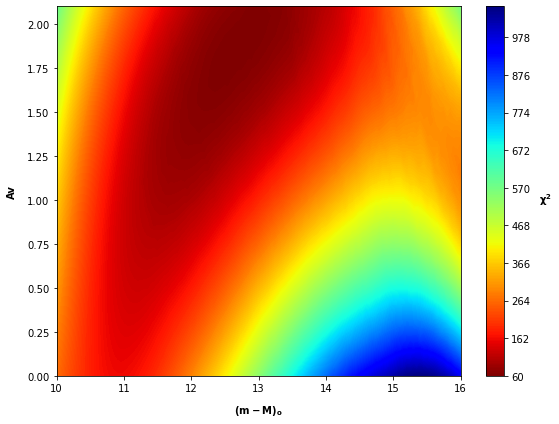

In [15]:
import matplotlib.pyplot as plt


x = modulo_distancia
y = avs
import matplotlib.cm as cm

cmap = cm.get_cmap('jet')
cmap = cm.jet_r
fig, ax = plt.subplots(figsize = (8,6)) 
levels = 600
im  = ax.contourf(x, y,  a.T, levels = levels, antialiased=False, cmap=cmap)#, norm=matplotlib.colors.LogNorm())
cbar = fig.colorbar(im)
cbar.set_label(r'$ \mathbf{\chi^2}$', fontweight = 'bold', rotation=0, labelpad=15)
ax.set_xlabel(r'$\mathbf{(m - M)_o}$', fontweight = 'bold', labelpad=10)
ax.set_ylabel('Av', fontweight = 'bold', labelpad=10)
plt.tight_layout()